In [47]:
import pandas as pd

df=pd.read_csv("personality_dataset (1).csv")
df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2477 non-null   float64
 1   Stage_fear                 2477 non-null   object 
 2   Social_event_attendance    2477 non-null   float64
 3   Going_outside              2477 non-null   float64
 4   Drained_after_socializing  2477 non-null   object 
 5   Friends_circle_size        2477 non-null   float64
 6   Post_frequency             2477 non-null   float64
 7   Personality                2477 non-null   object 
dtypes: float64(5), object(3)
memory usage: 174.2+ KB


In [48]:
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols,drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2477 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Time_spent_Alone               2477 non-null   float64
 1   Social_event_attendance        2477 non-null   float64
 2   Going_outside                  2477 non-null   float64
 3   Friends_circle_size            2477 non-null   float64
 4   Post_frequency                 2477 non-null   float64
 5   Stage_fear_Yes                 2477 non-null   bool   
 6   Drained_after_socializing_Yes  2477 non-null   bool   
 7   Personality_Introvert          2477 non-null   bool   
dtypes: bool(3), float64(5)
memory usage: 123.4 KB


In [49]:
from sklearn.preprocessing import MinMaxScaler
X = df_encoded.drop("Personality_Introvert", axis=1)
y = df_encoded["Personality_Introvert"]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [50]:
X_scaled.head()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency,Stage_fear_Yes,Drained_after_socializing_Yes
0,0.363636,0.4,0.857143,0.866667,0.5,0.0,0.0
1,0.818182,0.0,0.000000,0.000000,0.3,1.0,1.0
2,0.818182,0.1,0.285714,0.333333,0.2,1.0,1.0
3,0.000000,0.6,1.000000,0.933333,0.8,0.0,0.0
4,0.272727,0.9,0.571429,0.533333,0.5,0.0,0.0


In [51]:
import numpy as np
y = y.astype(np.float32).values.reshape(-1, 1)

Epoch 0, Loss: 0.7119
Epoch 100, Loss: 0.2633
Epoch 200, Loss: 0.2616
Epoch 300, Loss: 0.2616
Epoch 400, Loss: 0.2615
Epoch 500, Loss: 0.2615
Epoch 600, Loss: 0.2615
Epoch 700, Loss: 0.2615
Epoch 800, Loss: 0.2615
Epoch 900, Loss: 0.2615



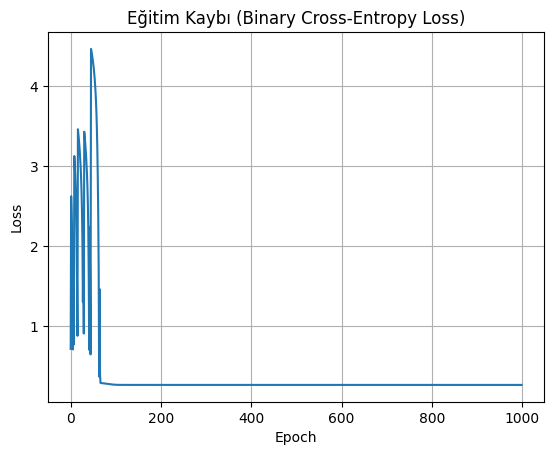

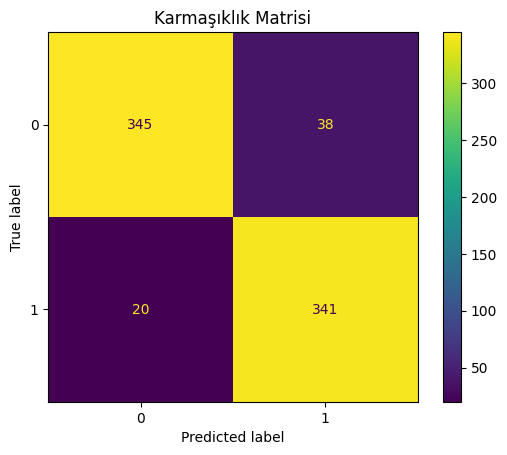

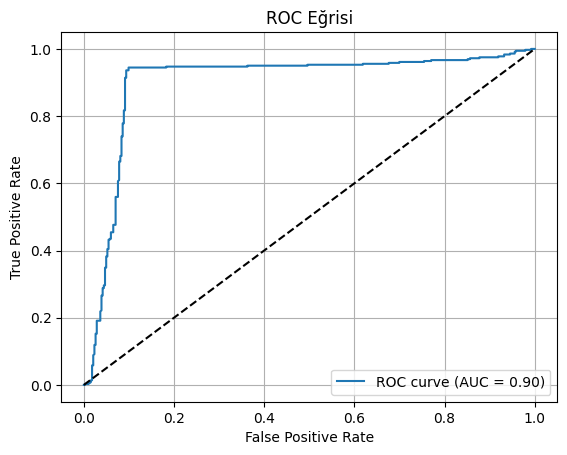

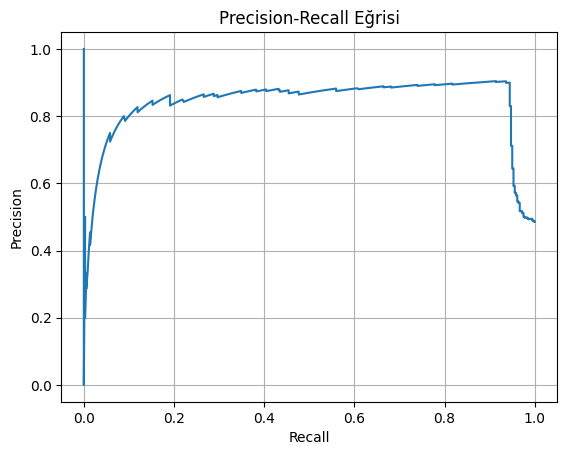


Accuracy: 0.9220
F1 Score: 0.9216
Binary Cross-Entropy Loss: 0.2715


In [54]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, accuracy_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Sigmoid aktivasyon ve türevi
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Sinir ağı sınıfı
class SimpleNeuralNetwork:
    def __init__(self, input_size):
        self.weights1 = np.random.randn(input_size, 2)
        self.bias1 = np.zeros((1, 2))

        self.weights2 = np.random.randn(2, 2)
        self.bias2 = np.zeros((1, 2))

        self.weights3 = np.random.randn(2, 1)
        self.bias3 = np.zeros((1, 1))

        self.losses = []  # loss takibi

    def forward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = sigmoid(self.z1)

        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = sigmoid(self.z2)

        self.z3 = np.dot(self.a2, self.weights3) + self.bias3
        self.output = sigmoid(self.z3)

        return self.output

    def backward(self, X, y, learning_rate):
        loss_deriv = self.output - y
        d_output = loss_deriv * sigmoid_derivative(self.output)

        d_weights3 = np.dot(self.a2.T, d_output)
        d_bias3 = np.sum(d_output, axis=0, keepdims=True)

        d_hidden2 = np.dot(d_output, self.weights3.T) * sigmoid_derivative(self.a2)
        d_weights2 = np.dot(self.a1.T, d_hidden2)
        d_bias2 = np.sum(d_hidden2, axis=0, keepdims=True)

        d_hidden1 = np.dot(d_hidden2, self.weights2.T) * sigmoid_derivative(self.a1)
        d_weights1 = np.dot(X.T, d_hidden1)
        d_bias1 = np.sum(d_hidden1, axis=0, keepdims=True)

        self.weights3 -= learning_rate * d_weights3
        self.bias3 -= learning_rate * d_bias3

        self.weights2 -= learning_rate * d_weights2
        self.bias2 -= learning_rate * d_bias2

        self.weights1 -= learning_rate * d_weights1
        self.bias1 -= learning_rate * d_bias1

    def train(self, X, y, epochs=1000, learning_rate=0.1):
        for epoch in range(epochs):
            self.forward(X)
            epsilon = 1e-15
            loss = -np.mean(y * np.log(self.output + epsilon) + (1 - y) * np.log(1 - self.output + epsilon))
            self.backward(X, y, learning_rate)
            self.losses.append(loss)
            if epoch % 100 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")

    def plot_loss(self):
        plt.figure()
        plt.plot(self.losses)
        plt.title("Eğitim Kaybı (Binary Cross-Entropy Loss)")
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.grid(True)
        plt.show()

    def plot_confusion_matrix(self, X, y_true):
        y_pred = self.forward(X) > 0.5
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot()
        plt.title("Karmaşıklık Matrisi")
        plt.show()

    def plot_roc_curve(self, X, y_true):
        y_scores = self.forward(X).ravel()
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)

        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Eğrisi")
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

    def plot_precision_recall_curve(self, X, y_true):
        y_scores = self.forward(X).ravel()
        precision, recall, _ = precision_recall_curve(y_true, y_scores)

        plt.figure()
        plt.plot(recall, precision, label="Precision-Recall curve")
        plt.xlabel("Recall")
        plt.ylabel("Precision")
        plt.title("Precision-Recall Eğrisi")
        plt.grid(True)
        plt.show()

# Örnek kullanım
if __name__ == "__main__":
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

    nn = SimpleNeuralNetwork(input_size=X_train.shape[1])
    nn.train(X_train, y_train, epochs=1000, learning_rate=0.1)

    print("\nTest Tahminleri:")
    preds_test = nn.forward(X_test)
    print(preds_test)

    nn.plot_loss()
    nn.plot_confusion_matrix(X_test, y_test)
    nn.plot_roc_curve(X_test, y_test)
    nn.plot_precision_recall_curve(X_test, y_test)

    y_pred_binary = (preds_test > 0.5).astype(int)
    y_test_binary = y_test.astype(int)

    acc = accuracy_score(y_test_binary, y_pred_binary)
    f1 = f1_score(y_test_binary, y_pred_binary)
    ce_loss = log_loss(y_test_binary.ravel(), preds_test.ravel())

    print(f"\nAccuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Binary Cross-Entropy Loss: {ce_loss:.4f}")